## Largely new metric testing

### Add paths to run locally or off Cheyenne or Casper 
(what is the difference between these two again?)

In [1]:
import sys
# Add common resources folder to path
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/CESM2_analysis')
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/CESM2_analysis/Common/')
# sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    ccrs, metrics, Iterable
    )

from functions import (
    masked_average, add_weights, sp_map,
    season_mean, get_dpm, leap_year, share_ylims,
    to_png
    )

from classes import SatComp_Metric, CT_SLF_Metric
from collections import deque
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Check running location and adjust working directory appropriately.

In [2]:
host = os.uname()[1]
if 'jupyter' in host.split('-'): # Check if running on NIRD through the Jupyter Hub
    print('Running through MC2 Jupyter Hub')
    model_dir = '/mnt/mcc-ns9600k/jonahks/'
    os.chdir(model_dir)
    
if 'casper' in host: # Check if running on NIRD through the Jupyter Hub
    print('Running through CISL Casper')
    model_dir = '/glade/p/cesm/pcwg/jenkay/COSP/'
    os.chdir(model_dir)

else:  # Assume that we're running on a local machine and mounting NIRD
    print('Running on %s, attempting to mount ns9600k/jonahks/ from NIRD' % str(host))
    os.system('fusermount -zu ~/drivemount/')  # unmount first
    os.system('sshfs jonahks@login.nird.sigma2.no:"p/jonahks/" ~/drivemount/')    # Calling mountnird from .bashrc doesn't work
    os.chdir('/home/jonahks/drivemount/')
    save_dir = '~/DATAOUT/'
    save_to = os.path.expanduser(save_dir)

output_dir = '/glade/u/home/jonahshaw/figures/'
case_dir = '/glade/p/cesm/pcwg/jenkay/COSP/cesm21/' 

# Check that each important directory can be accessed:    
access_paths = os.path.exists(output_dir) and os.path.exists(case_dir) #and os.path.exists(conv_dir)
print('Can access all directory paths:', access_paths)

Running through CISL Casper
Can access all directory paths: True


## Try to get this to work!

In [10]:
os.listdir()

['cesm21', 'cesm1', 'cesm112lens', 'cesm20']

## Load metrics

In [4]:
cam6icemetric = SatComp_Metric(case_dir)
cam6icemetric.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1', label="CAM6-OsloIce")

Loading GOCCP data...done.
Loading CALIOP SLFs...done
Loading CERES-EBAF fluxes...done.
Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1
20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1 load successfully.


In [6]:
cam6icemetric.cloud_polar_plot()

In [4]:
allmetric = SatComp_Metric(case_dir)

allmetric.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="CAM6-Oslo")
allmetric.add_case('CESM2_slfvars', label="CAM6")
allmetric.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1', label="CAM6-OsloIce")

allmetric.add_case("20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10",label='CAM6-Oslo \n Fit 1')
allmetric.add_case('20200629_morn_cam61satcomp_wbf_0.5_inp_0.05',label='CAM6-OsloIce \n Fit 2')
allmetric.add_case('20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1',label='CAM6-OsloIce \n Fit 3')
allmetric.add_case('20200713_CESM2_satcomp_wbf_1_inp_100',label="CAM6 Fit")

Loading GOCCP data...done.
Loading CALIOP SLFs...done
Loading CERES-EBAF fluxes...done.
Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1
20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1 load successfully.
Trying to load concatenated file for CESM2_slfvars
CESM2_slfvars load successfully.
Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1
20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1 load successfully.
Trying to load concatenated file for 20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10
20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10 load successfully.
Trying to load concatenated file for 20200629_morn_cam61satcomp_wbf_0.5_inp_0.05
20200629_morn_cam61satcomp_wbf_0.5_inp_0.05 load successfully.
Trying to load concatenated file for 20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1
20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1 load successfully.
Trying to load

In [7]:
basemetric = SatComp_Metric(case_dir)
# mainmetric.add_case('20200327_132118_singleparam_noresm2satcomp_wbf_1_inp_1') # origin point

basemetric.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="CAM6-Oslo")
basemetric.add_case('CESM2_slfvars', label="CAM6")
basemetric.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1', label="CAM6-OsloIce")

Loading GOCCP data...done.
Loading CALIOP SLFs...done
Loading CERES-EBAF fluxes...done.
Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1
20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1 load successfully.
Trying to load concatenated file for CESM2_slfvars
CESM2_slfvars load successfully.
Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1
20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1 load successfully.


In [4]:
basemetric_slf = CT_SLF_Metric(case_dir)

basemetric_slf.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="CAM6-Oslo")
basemetric_slf.add_case('CESM2_slfvars', label="CAM6")
basemetric_slf.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1', label="CAM6-OsloIce")

Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for CESM2_slfvars


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


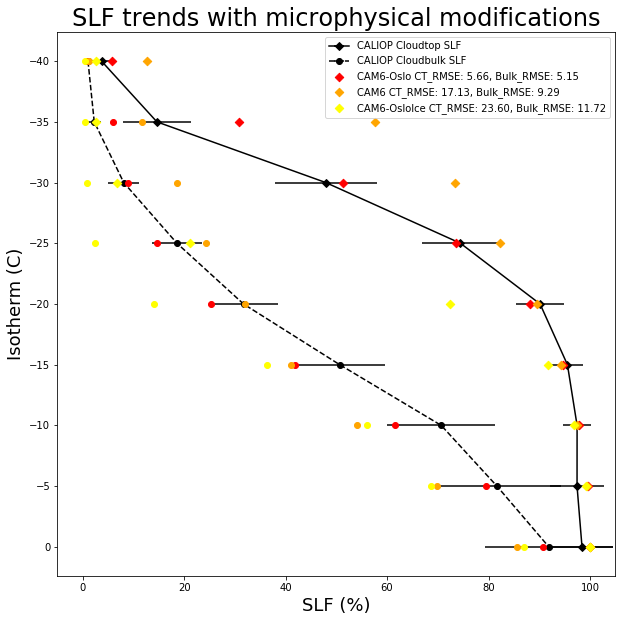

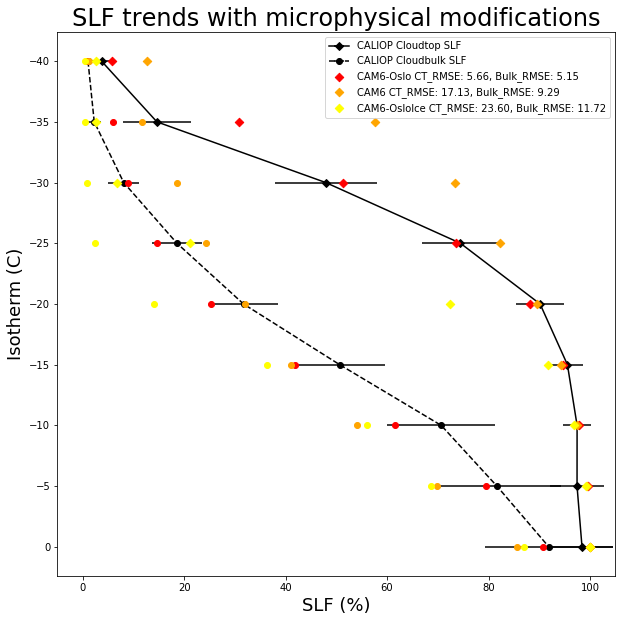

In [5]:
basemetric_slf.plot_isos_all()

In [141]:
fitmetric = SatComp_Metric(case_dir)

fitmetric.add_case("20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10",label='CAM6-Oslo \n Fit 1')
# fitmetric.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_0.05',label='CAM6-OsloIce \n Fit 2')
fitmetric.add_case('20200629_morn_cam61satcomp_wbf_0.5_inp_0.05',label='CAM6-OsloIce \n Fit 2')
fitmetric.add_case('20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1',label='CAM6-OsloIce \n Fit 3')
fitmetric.add_case('20200713_CESM2_satcomp_wbf_1_inp_100',label="CAM6 Fit")

Loading GOCCP data...done.
Loading CALIOP SLFs...done
Loading CERES-EBAF fluxes...done.
Trying to load concatenated file for 20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10
20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10 load successfully.
Trying to load concatenated file for 20200629_morn_cam61satcomp_wbf_0.5_inp_0.05
20200629_morn_cam61satcomp_wbf_0.5_inp_0.05 load successfully.
Trying to load concatenated file for 20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1
20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1 load successfully.
Trying to load concatenated file for 20200713_CESM2_satcomp_wbf_1_inp_100
20200713_CESM2_satcomp_wbf_1_inp_100 load successfully.


In [142]:
fitmetric_slf = CT_SLF_Metric(case_dir)

fitmetric_slf.add_case("20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10",label='CAM6-Oslo Fit 1')
fitmetric_slf.add_case('20200629_morn_cam61satcomp_wbf_0.5_inp_0.05',label='CAM6-OsloIce Fit 2')
# fitmetric_slf.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_0.05',label='CAM6-OsloIce Fit 2')
fitmetric_slf.add_case('20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1',label='CAM6-OsloIce Fit 3')
# fitmetric_slf.add_case('CESM2_fittest',path='mnth15runs/')
fitmetric_slf.add_case('20200713_CESM2_satcomp_wbf_1_inp_100',label="CAM6 Fit")

Trying to load concatenated file for 20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for 20200629_morn_cam61satcomp_wbf_0.5_inp_0.05


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for 20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for 20200713_CESM2_satcomp_wbf_1_inp_100


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


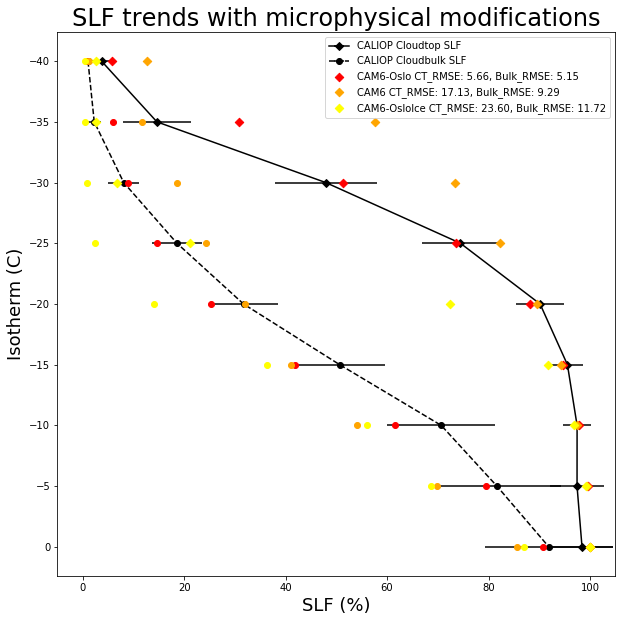

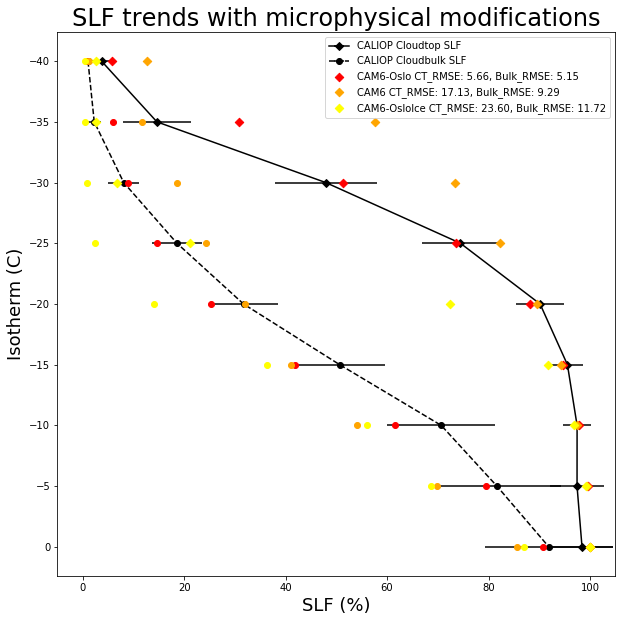

In [5]:
basemetric_slf.plot_isos_all()

/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


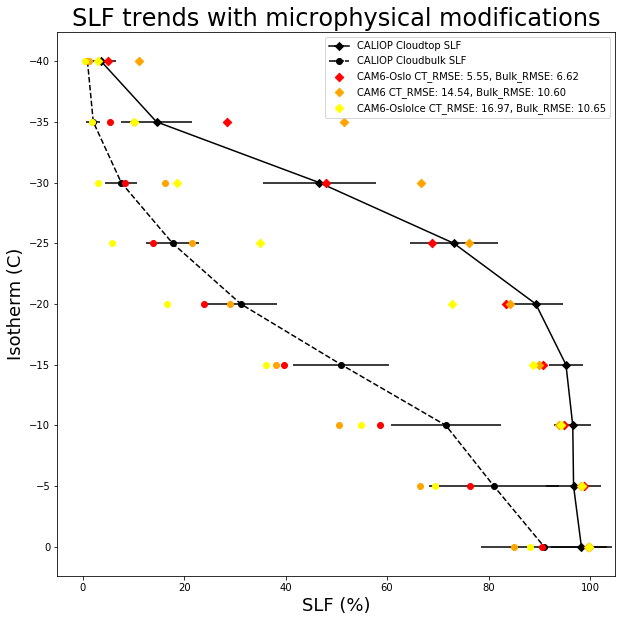

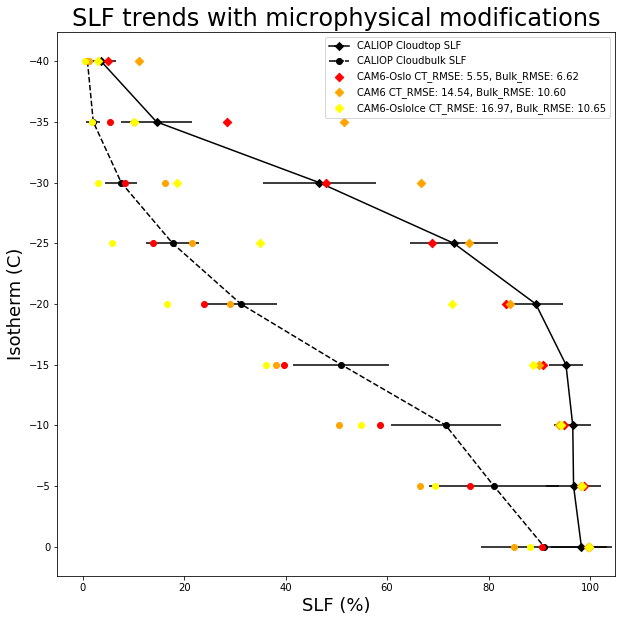

In [6]:
basemetric_slf.plot_isos_all(lat_range=[60,82])

/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.p

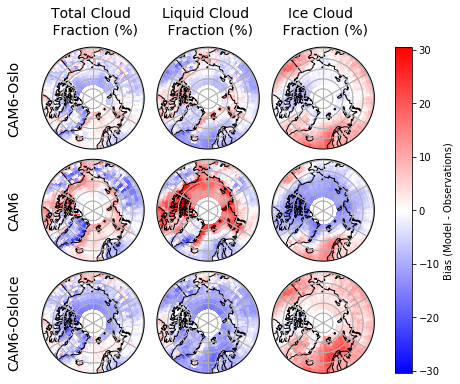

In [33]:
fig1 = basemetric.plot2D('CLDTOT_CAL',bias=True,layers=True,projection="Arctic")

In [81]:
to_png(fig1,'base_annual_biases')

In [83]:
fig2 = fitmetric.plot2D('CLDTOT_CAL',bias=True,layers=True,projection="Arctic")

/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.p

In [84]:
to_png(fig2,'fitted_annual_biases')

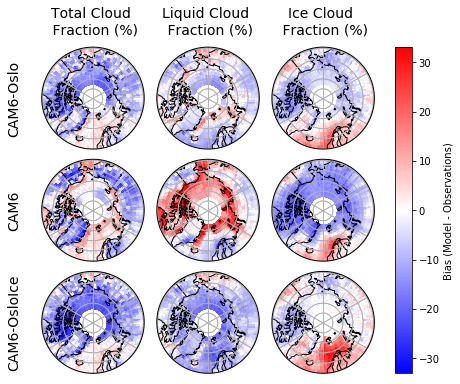

In [85]:
fig3 = basemetric.plot2D('CLDTOT_CAL',season='MAM',layers=True,projection="Arctic",bias=True)

In [86]:
to_png(fig3,'base_spring_biases')

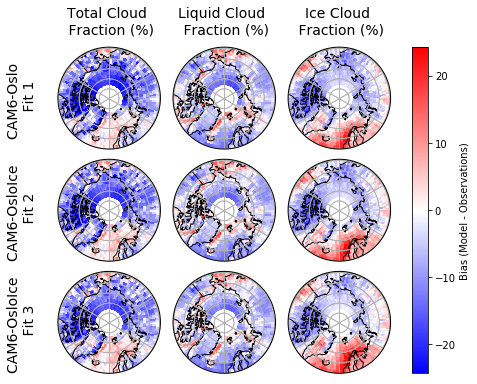

In [87]:
fig4 = fitmetric.plot2D('CLDTOT_CAL',season='MAM',layers=True,projection="Arctic",bias=True)

In [88]:
to_png(fig4,'fitted_spring_biases')

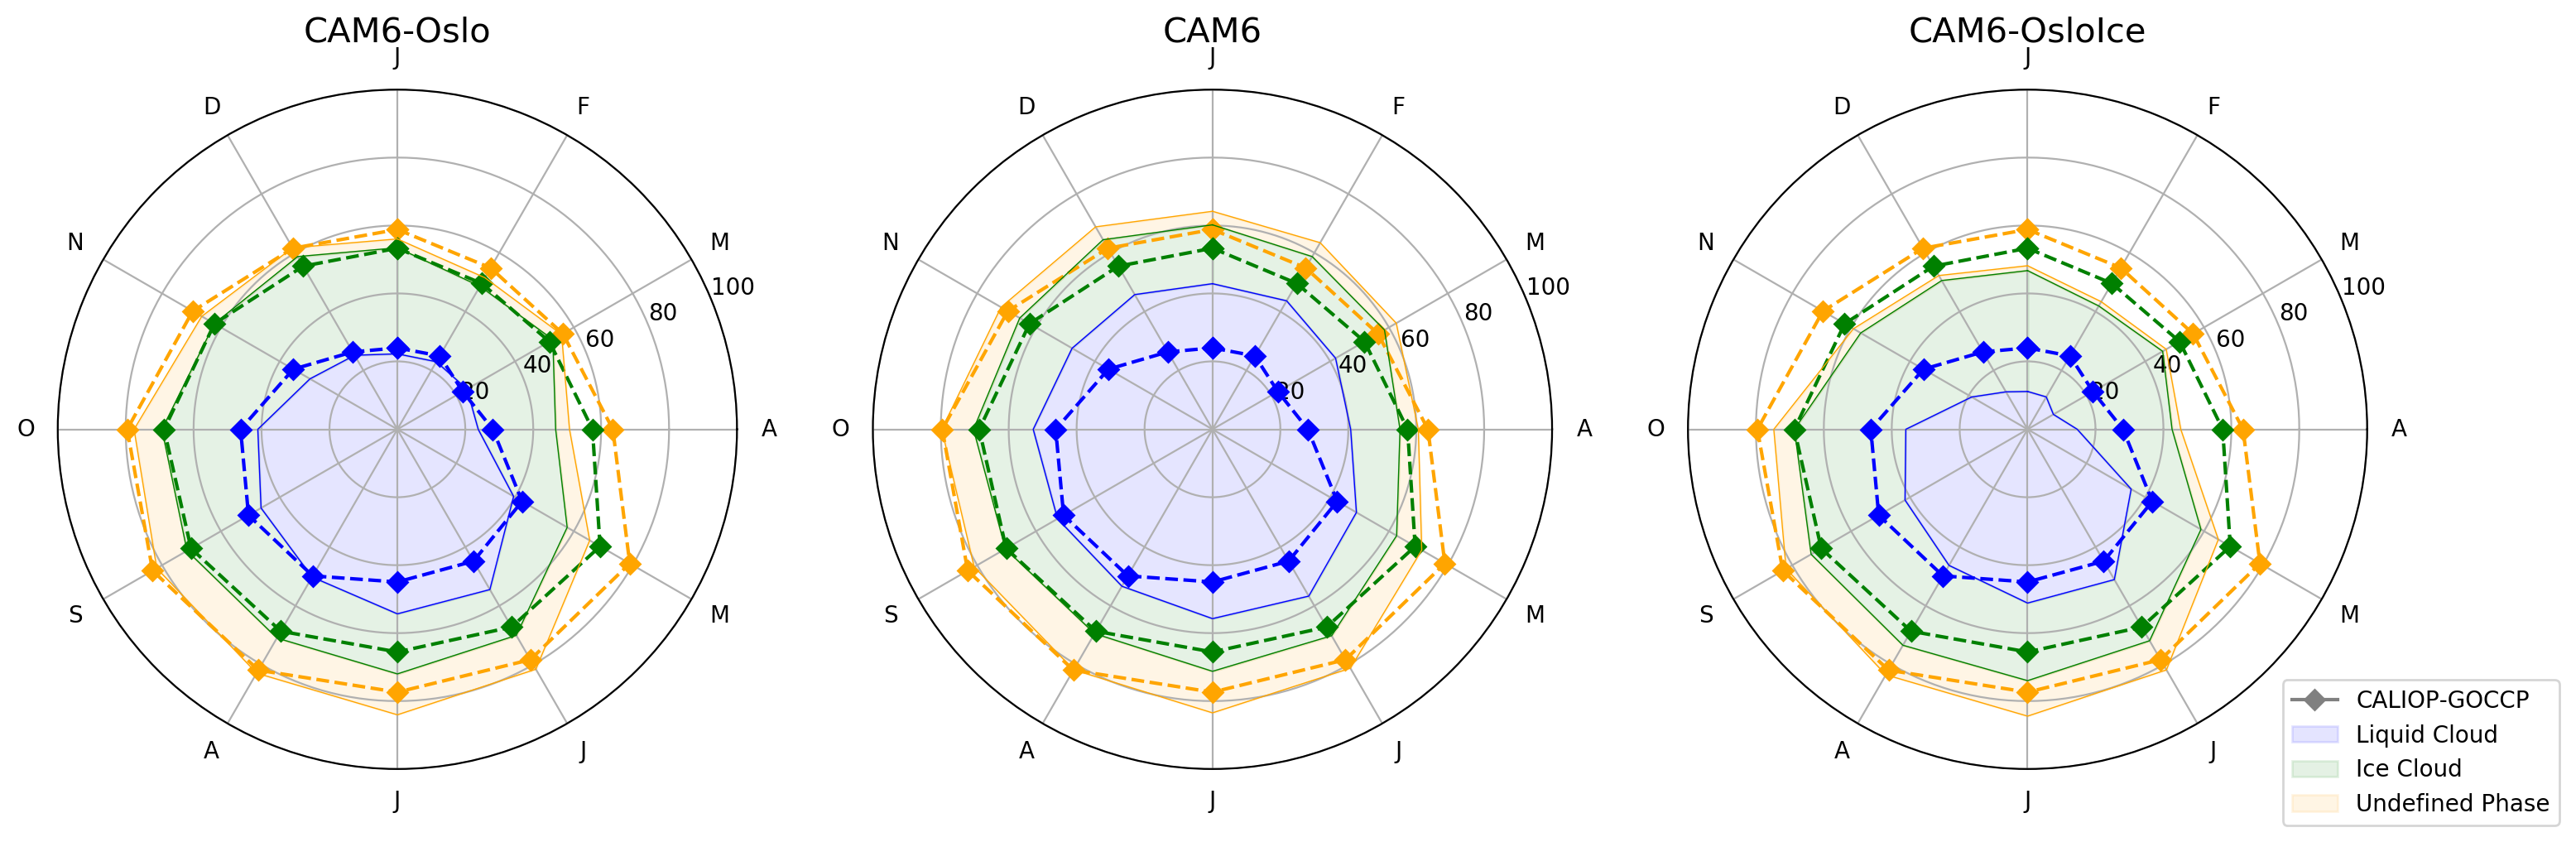

In [151]:
fig5 = basemetric.cloud_polar_plot()

In [36]:
allmetric.band_bias('FLDS',[66,82])

[['CAM6-Oslo', array(-0.93717078)],
 ['CAM6', array(5.41492505)],
 ['CAM6-OsloIce', array(-3.88876149)],
 ['CAM6-Oslo \n Fit 1', array(-2.38376698)],
 ['CAM6-OsloIce \n Fit 2', array(-0.7149809)],
 ['CAM6-OsloIce \n Fit 3', array(1.01851342)],
 ['CAM6 Fit', array(0.79962104)]]

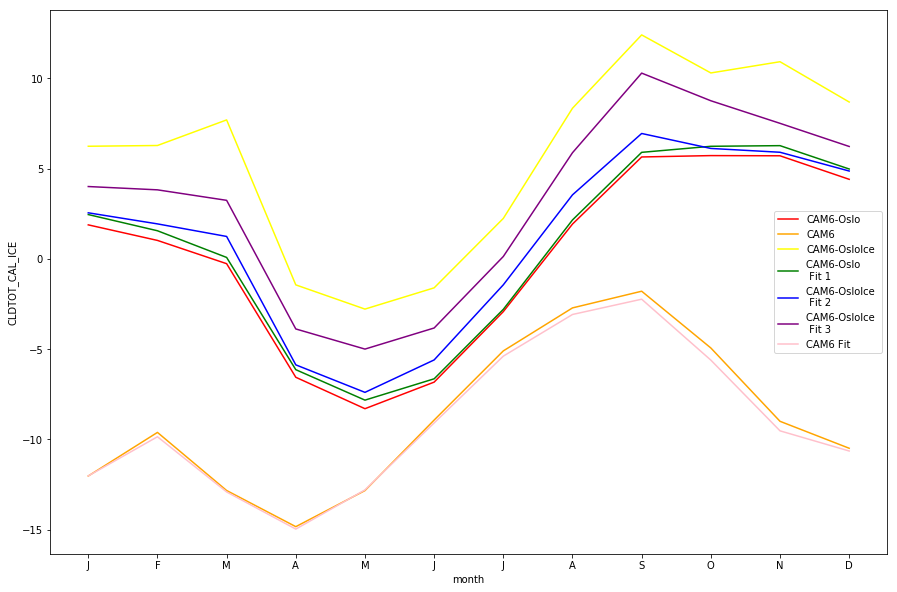

In [25]:
fig = allmetric.plot_months_line('CLDTOT_CAL_ICE', bias=True)

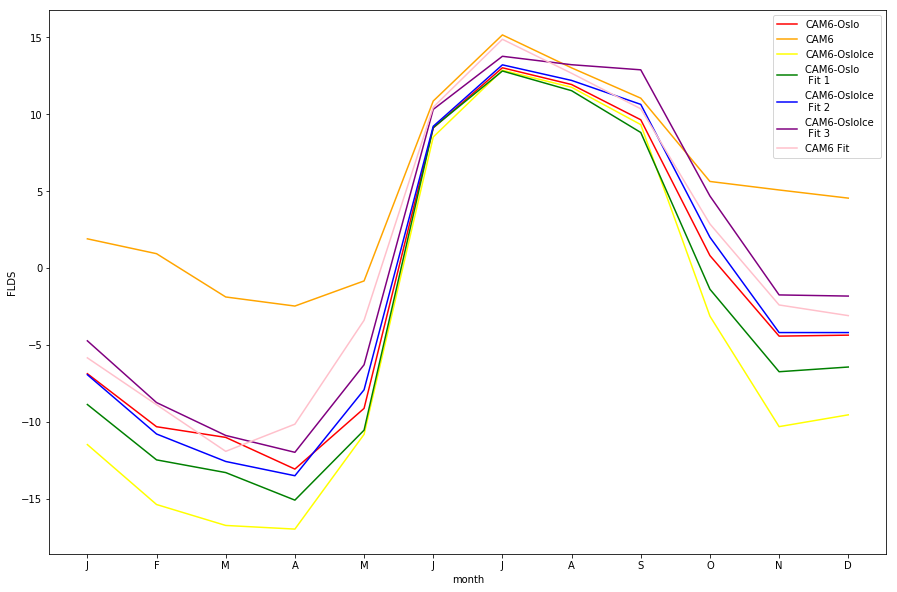

In [21]:
fig = allmetric.plot_months_line('FLDS', bias=True)

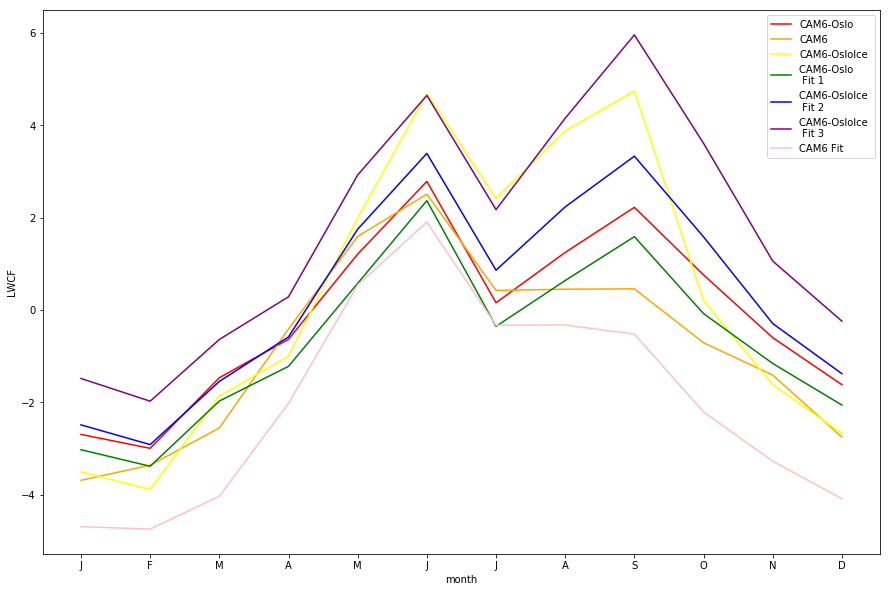

In [22]:
fig = allmetric.plot_months_line('LWCF', bias=True)

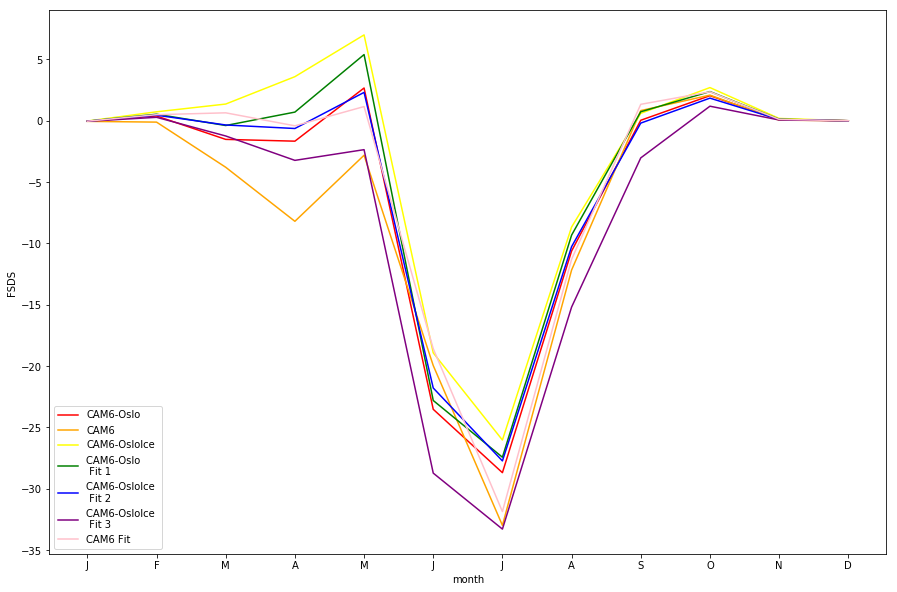

In [7]:
fig1 = allmetric.plot_months_line('FSDS',bias=True)

In [10]:
fig1.axes[0]

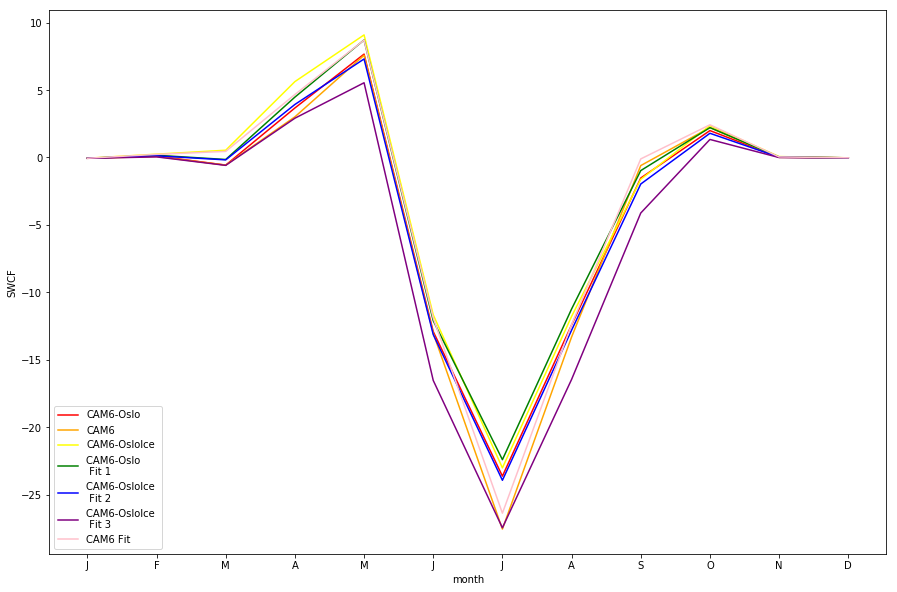

In [8]:
fig2 = allmetric.plot_months_line('SWCF',bias=True)

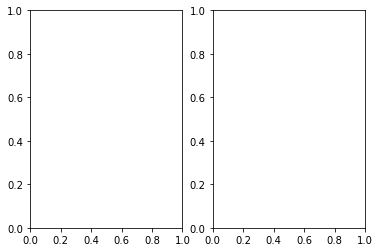

In [16]:
combi = plt.subplots(1,2)
ax1 = fig1.axes
ax2 = fig2.axes
# combi[1][0] = ax1
# combi[1][1] = ax2

In [20]:
combi[1]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc649e09dd8>,
      dtype=object)

In [27]:
combi[1][0] = ax1
combi[1][1] = ax2

In [36]:
fig1.axes

In [34]:
# https://stackoverflow.com/questions/55419931/can-you-copy-only-some-subplots-to-a-new-figure

import pickle
import io

# pickle the figure, then unpickle it to a new figure
buf = io.BytesIO()
pickle.dump(fig1, buf)
buf.seek(0)
fig2=pickle.load(buf)

AttributeError: Can't pickle local object 'GeoAxes._pcolormesh_patched.<locals>.<lambda>'

In [ ]:
# sets which subplots to keep
# note that i == 1correponds to a[0,1]
tokeep=[1,2]
axestokeep=[]

for i,a in enumerate(fig2.axes):
    if not i in(tokeep):
        fig2.delaxes(a)
    else:
        axestokeep.extend([a])

axestokeep[0].change_geometry(1,2,1)
axestokeep[1].change_geometry(1,2,2)

In [ ]:
fig2._axstack.add(fig2._make_key(a), a)

In [90]:
to_png(fig5,'base_circleplots')

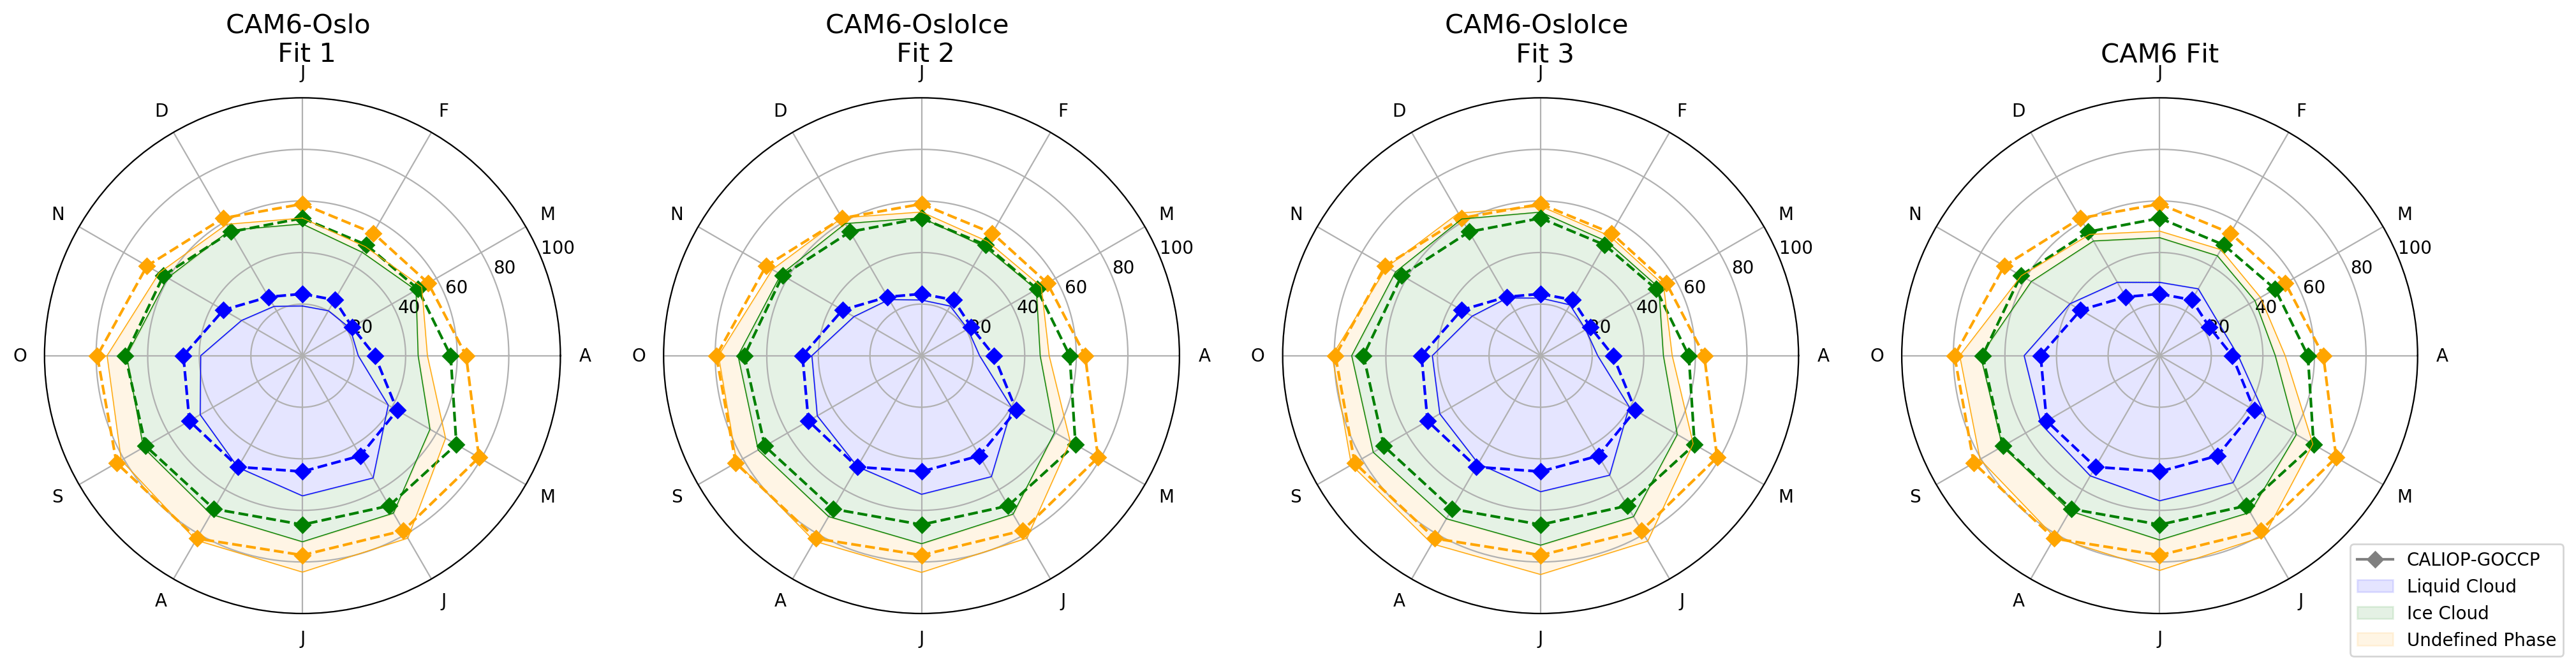

In [144]:
fig6 = fitmetric.cloud_polar_plot()

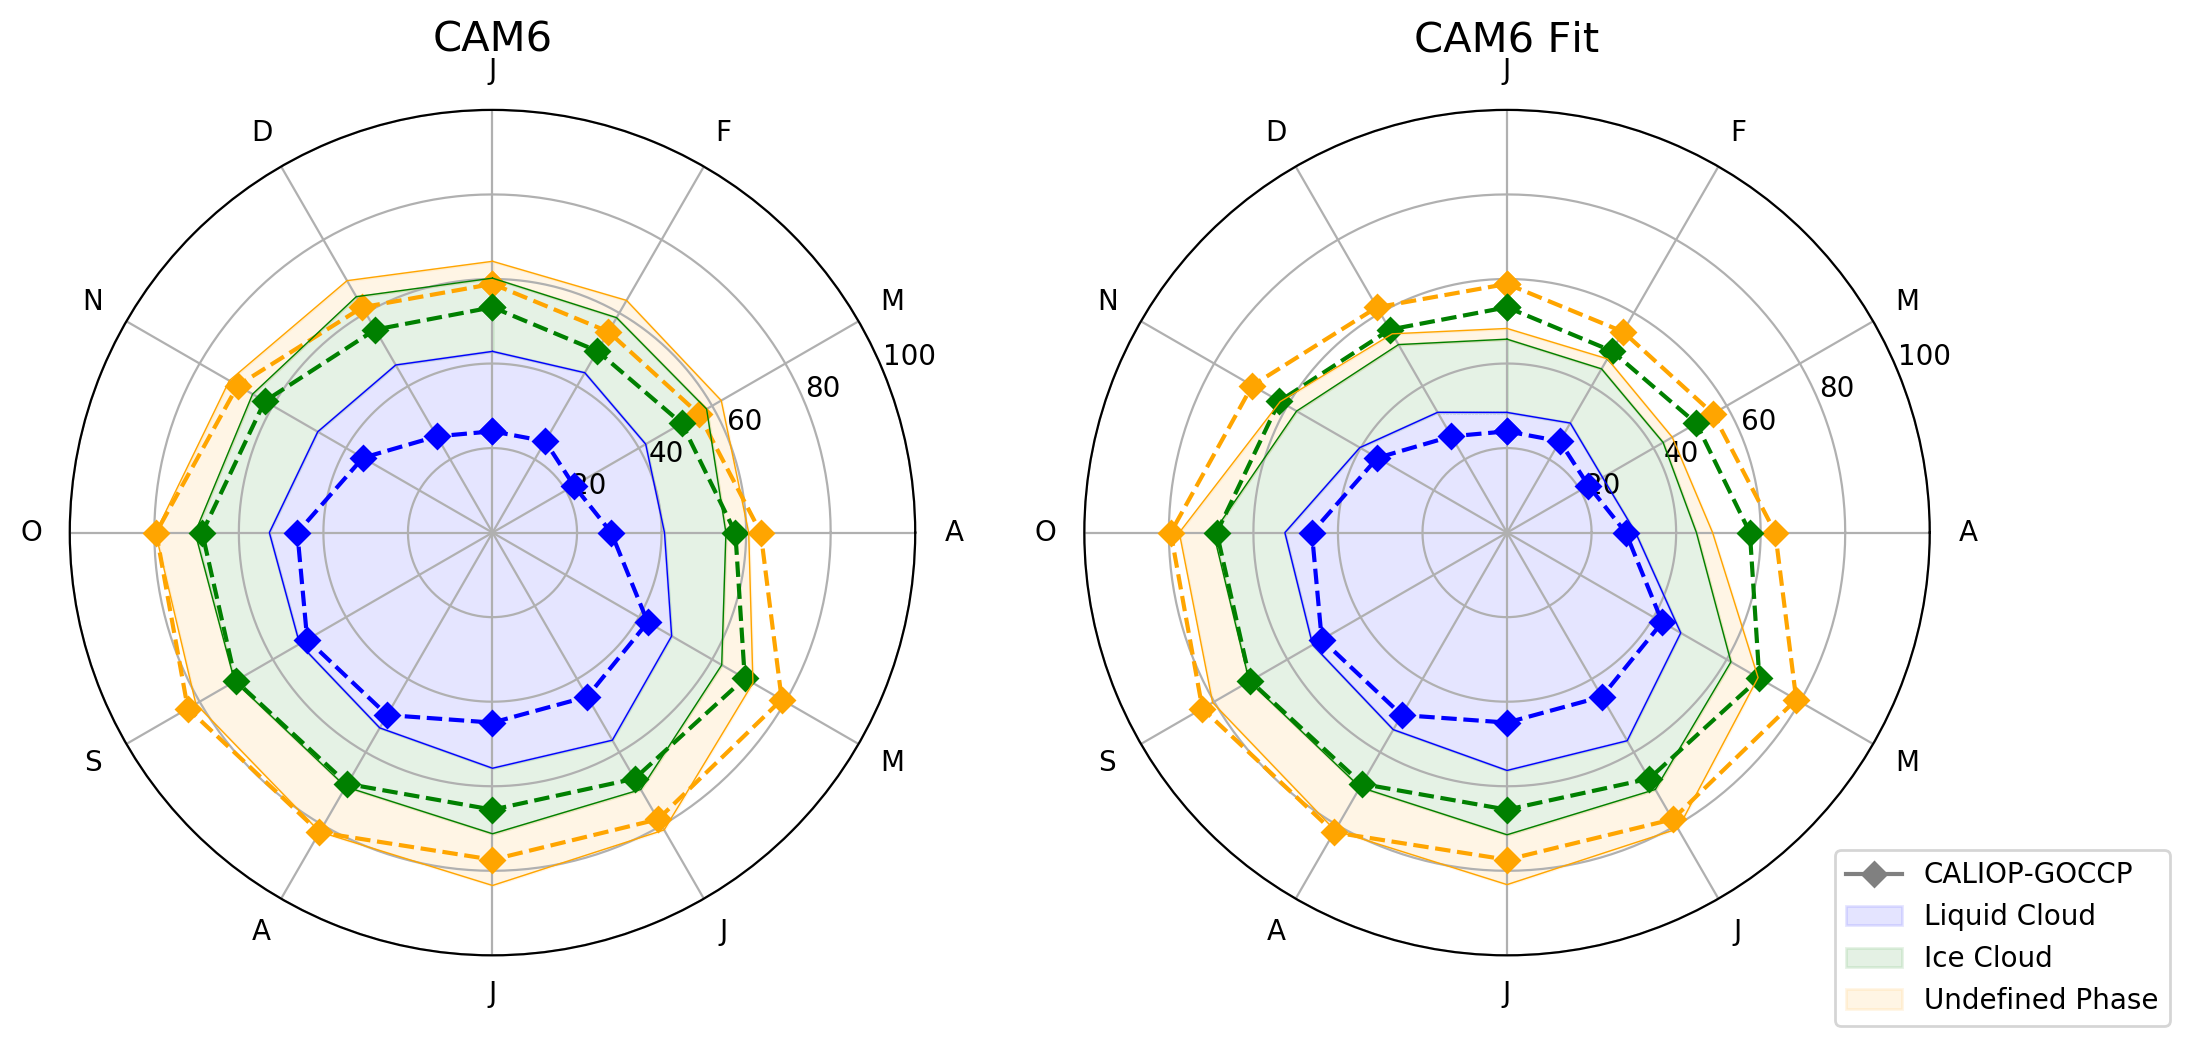

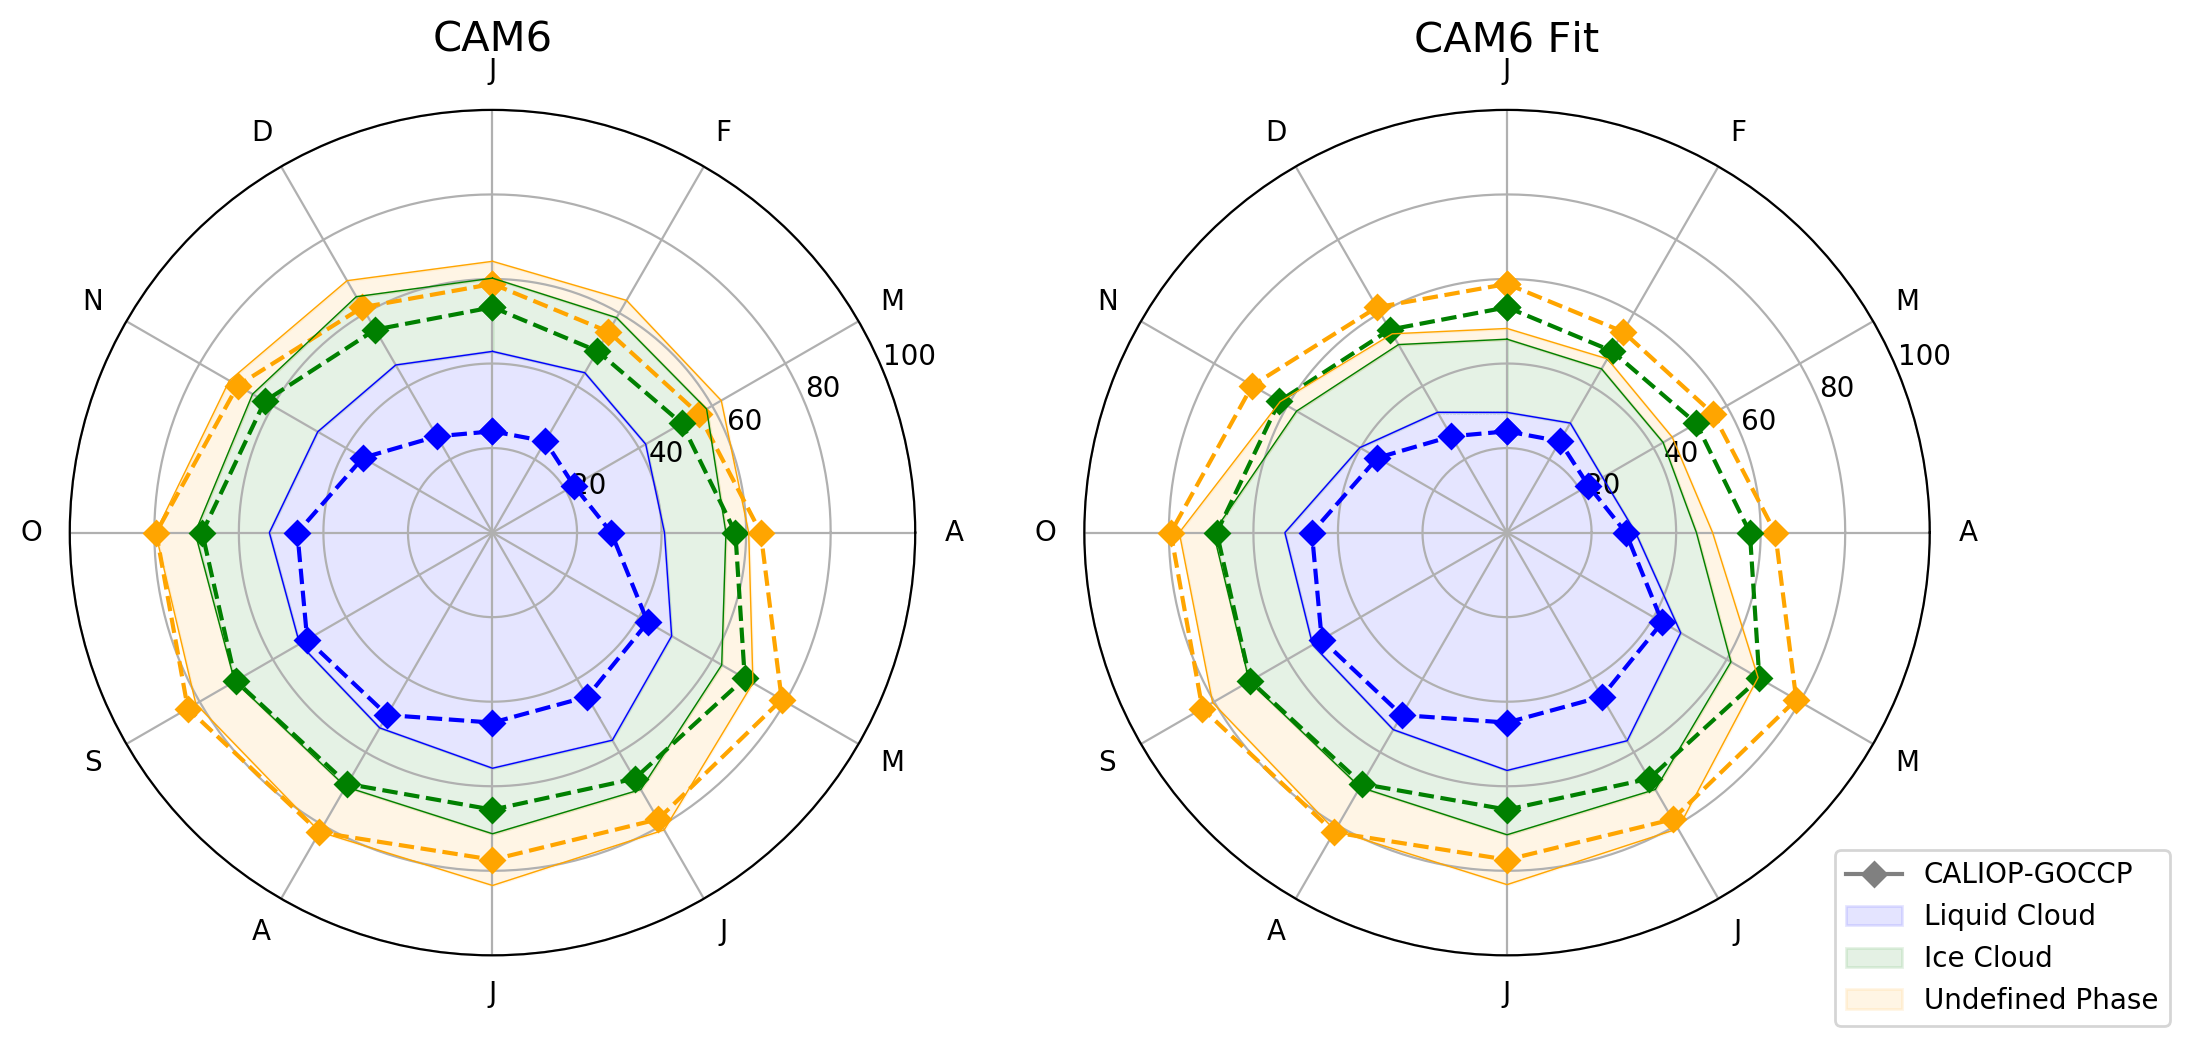

In [146]:
cesmmetric.cloud_polar_plot()

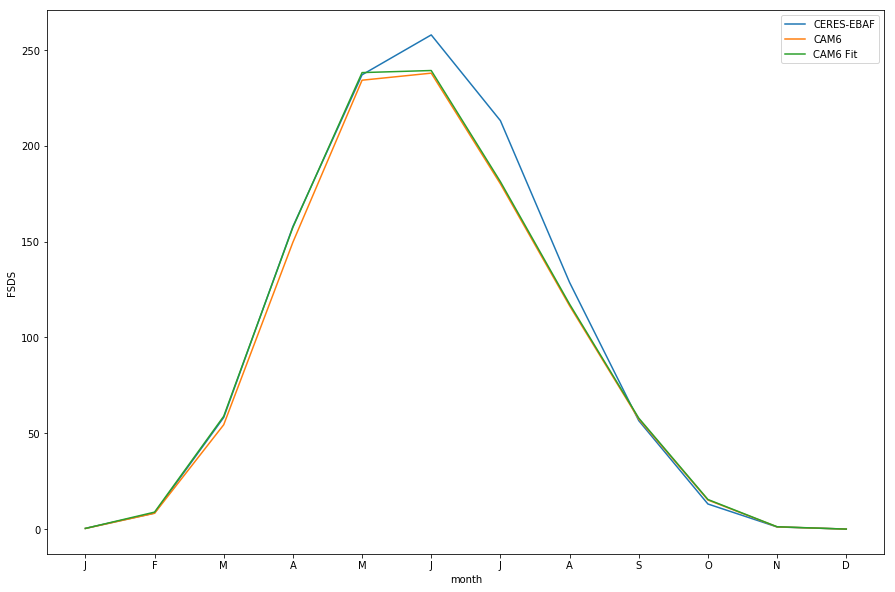

In [149]:
o = cesmmetric.plot_months_line(['FSDS'])

In [92]:
to_png(fig6,'fitted_circleplots')

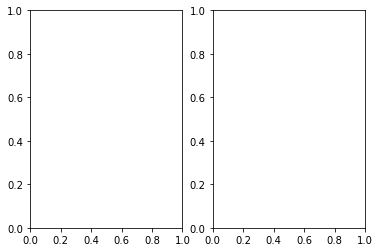

In [26]:
combi = plt.subplots(1,2)
ax1 = fig3.axes
ax2 = fig4.axes
combi[1][0] = ax1
combi[1][1] = ax2

In [21]:
allmetric.band_bias("LWCF",[66,82],season="MAM")

[['CAM6-Oslo', array(-2.82983649)],
 ['CAM6', array(-3.15028868)],
 ['CAM6-OsloIce', array(-2.87787083)],
 ['CAM6-Oslo \n Fit 1', array(-3.41432371)],
 ['CAM6-OsloIce \n Fit 2', array(-2.62710813)],
 ['CAM6-OsloIce \n Fit 3', array(-1.61007423)],
 ['CAM6 Fit', array(-4.49960613)]]

In [127]:
fitmetric.band_bias("SWCF",[66,82],season='MAM')

[['CAM6-Oslo \n Fit 1', array(9.23928583)],
 ['CAM6-OsloIce \n Fit 2', array(8.49211096)],
 ['CAM6-OsloIce \n Fit 3', array(7.33010198)]]

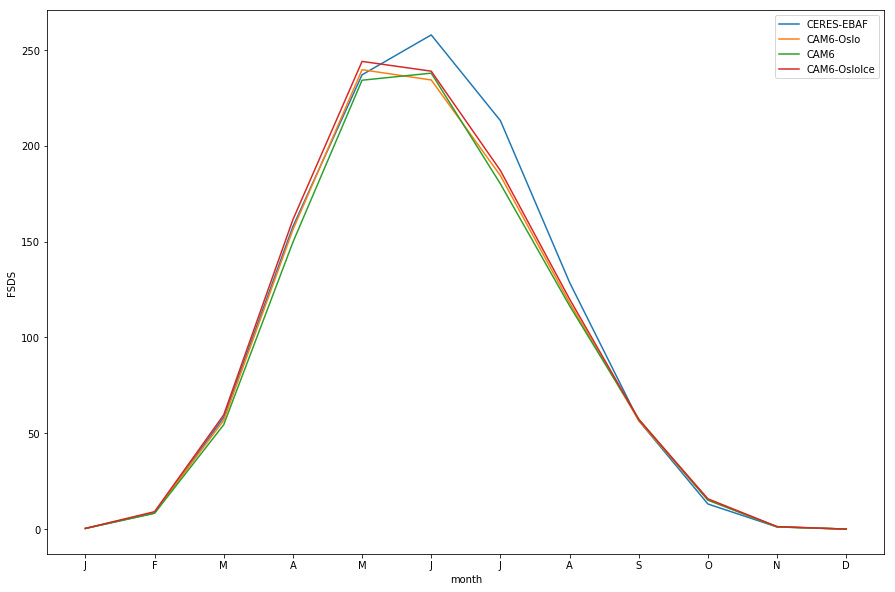

In [137]:
o = basemetric.plot_months_line(['FSDS'])

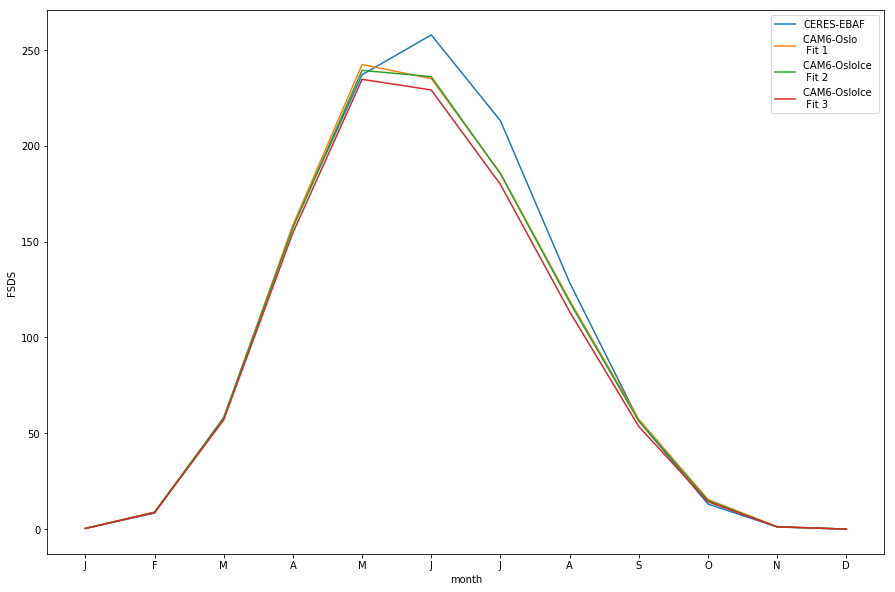

In [138]:
o = fitmetric.plot_months_line(['FSDS'])

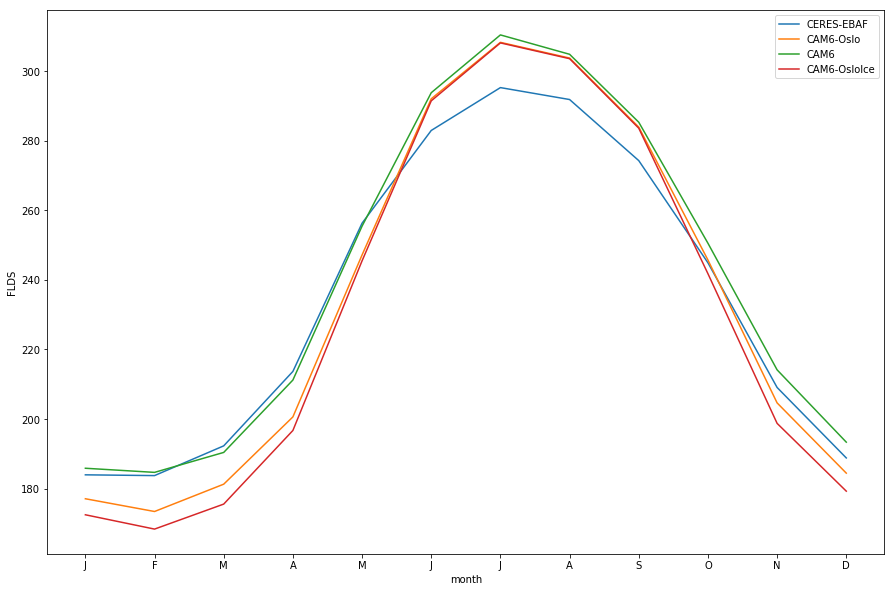

In [136]:
o = basemetric.plot_months_line(['FLDS'])

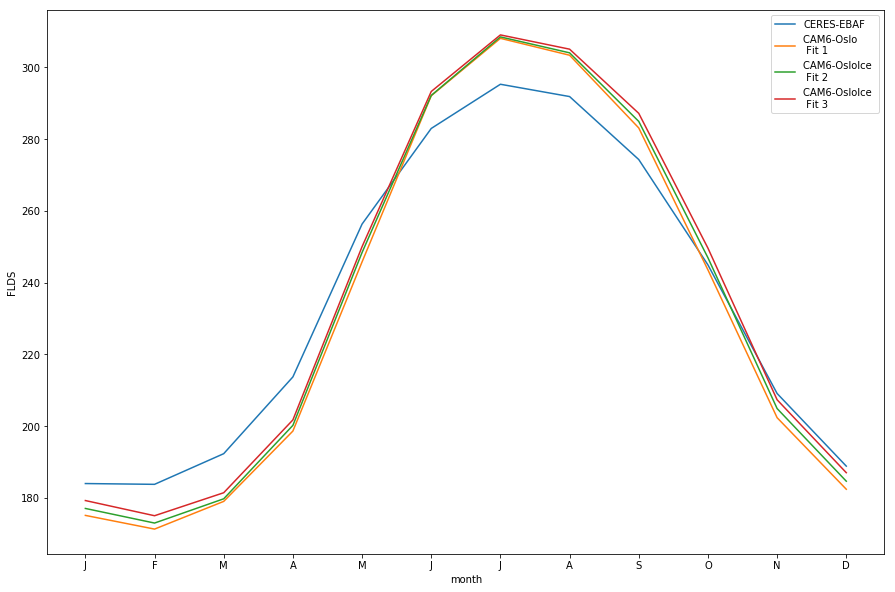

In [139]:
o = fitmetric.plot_months_line(['FLDS'])

In [134]:
basemetric.ceres_data

<xarray.Dataset>
Dimensions:                (lat: 96, lon: 144, time: 48)
Coordinates:
  * time                   (time) datetime64[ns] 2009-06-15 ... 2013-05-15
  * lon                    (lon) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                    (lat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
Data variables:
    FSNT                   (time, lat, lon) float32 ...
    FLNT                   (time, lat, lon) float32 ...
    toa_net_all_mon        (time, lat, lon) float32 ...
    toa_sw_clr_c_mon       (time, lat, lon) float32 ...
    toa_lw_clr_c_mon       (time, lat, lon) float32 ...
    toa_net_clr_c_mon      (time, lat, lon) float32 ...
    FSNTC                  (time, lat, lon) float32 ...
    FLNTC                  (time, lat, lon) float32 ...
    toa_net_clr_t_mon      (time, lat, lon) float32 ...
    SWCF                   (time, lat, lon) float32 -0.046 -0.046 ... -31.917309
    LWCF                   (time, lat, lon) float32 -1.2713089 ... 11.950989
    toa_cre_net_mon        (time, lat, lon) float32 ...
    FSDS                   (time, lat, lon) float32 ...
    sfc_sw_down_clr_c_mon  (time, lat, lon) float32 ...
    sfc_sw_down_clr_t_mon  (time, lat, lon) float32 ...
    sfc_sw_up_all_mon      (time, lat, lon) float32 ...
    sfc_sw_up_clr_c_mon    (time, lat, lon) float32 ...
    sfc_sw_up_clr_t_mon    (time, lat, lon) float32 ...
    FLDS                   (time, lat, lon) float32 ...
    sfc_lw_down_clr_c_mon  (time, lat, lon) float32 ...
    sfc_lw_down_clr_t_mon  (time, lat, lon) float32 ...
    sfc_lw_up_all_mon      (time, lat, lon) float32 ...
    sfc_lw_up_clr_c_mon    (time, lat, lon) float32 ...
    sfc_lw_up_clr_t_mon    (time, lat, lon) float32 ...
    sfc_net_sw_all_mon     (time, lat, lon) float32 ...
    sfc_net_sw_clr_c_mon   (time, lat, lon) float32 ...
    sfc_net_sw_clr_t_mon   (time, lat, lon) float32 ...
    sfc_net_lw_all_mon     (time, lat, lon) float32 ...
    sfc_net_lw_clr_c_mon   (time, lat, lon) float32 ...
    sfc_net_lw_clr_t_mon   (time, lat, lon) float32 ...
    sfc_net_tot_all_mon    (time, lat, lon) float32 ...
    sfc_net_tot_clr_c_mon  (time, lat, lon) float32 ...
    sfc_net_tot_clr_t_mon  (time, lat, lon) float32 ...
    sfc_cre_net_sw_mon     (time, lat, lon) float32 ...
    sfc_cre_net_lw_mon     (time, lat, lon) float32 ...
    sfc_cre_net_tot_mon    (time, lat, lon) float32 ...
    cell_weight            (lat, lon) float64 1.013e-18 1.013e-18 ... 1.013e-18
Attributes:
    CDI:          Climate Data Interface version 1.9.3 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Thu Jul 09 23:07:42 2020: cdo -s remap,/nird/home/jonahks/p...
    institution:  NASA Langley Research Center
    title:        CERES EBAF TOA and Surface Fluxes. Monthly Averages and 07/...
    comment:      Climatology from 07/2005 to 06/2015
    version:      Edition 4.1; Release Date May 28, 2019
    DOI:          10.5067/TERRA-AQUA/CERES/EBAF_L3B004.1
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

In [8]:
for i in allmetric.get_cases():
    print(i)
    _case = allmetric.get_case(i)
    _da = _case.case_da
    _da = _da.sel(lat=slice(66,82))
    _da = _da.sel(lev = 860, method='nearest') # 860
    try:
        ice_rad = _da['AWNI'] / _da['FREQI']
        mean_rad = ice_rad.mean(['time','lat','lon'])
        print(mean_rad)
    except:
        pass
#     ice_rad = _case['AREI'] /

20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1
<xarray.DataArray ()>
array(4058.652, dtype=float32)
Coordinates:
    lev      float64 859.5
CESM2_slfvars
<xarray.DataArray ()>
array(5212.0166, dtype=float32)
Coordinates:
    lev      float64 859.5
20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1
<xarray.DataArray ()>
array(15173.898, dtype=float32)
Coordinates:
    lev      float64 859.5
20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10
<xarray.DataArray ()>
array(3815.743, dtype=float32)
Coordinates:
    lev      float64 859.5
20200629_morn_cam61satcomp_wbf_0.5_inp_0.05
<xarray.DataArray ()>
array(5350.065, dtype=float32)
Coordinates:
    lev      float64 859.5
20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1
<xarray.DataArray ()>
array(8479.729, dtype=float32)
Coordinates:
    lev      float64 859.5
20200713_CESM2_satcomp_wbf_1_inp_100
<xarray.DataArray ()>
array(4733.9507, dtype=float32)
Coordinates:
    lev      float64 859.5


In [5]:
just_controls = SatComp_Metric(case_dir)
just_controls.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="CAM6-Oslo")
just_controls.add_case('CESM2_slfvars', label="CAM6")

Loading GOCCP data...done.
Loading CALIOP SLFs...done
Loading CERES-EBAF fluxes...done.
Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1
20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1 load successfully.
Trying to load concatenated file for CESM2_slfvars
CESM2_slfvars load successfully.


/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


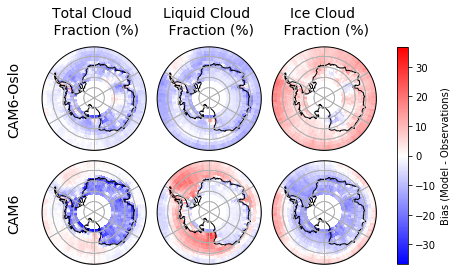

In [6]:
doop = just_controls.plot2D('CLDTOT_CAL',bias=True,projection="Antarctic", layers=True)

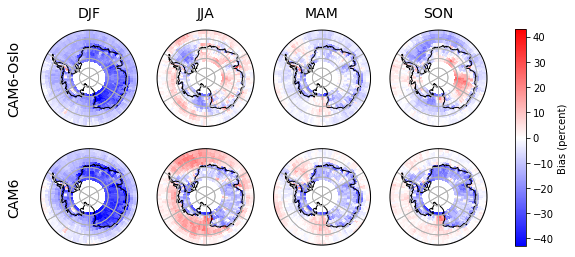

In [7]:
doop = just_controls.plot2D('CLDTOT_CAL',bias=True,projection="Antarctic", layers=False,seasonal=True)

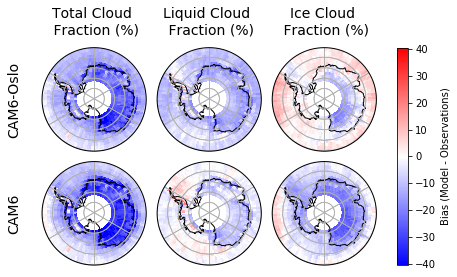

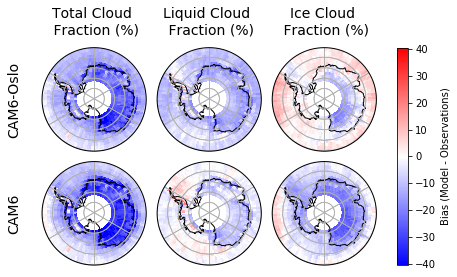

In [9]:
just_controls.plot2D('CLDTOT_CAL',bias=True,layers=True,season="DJF",projection="Antarctic")

/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


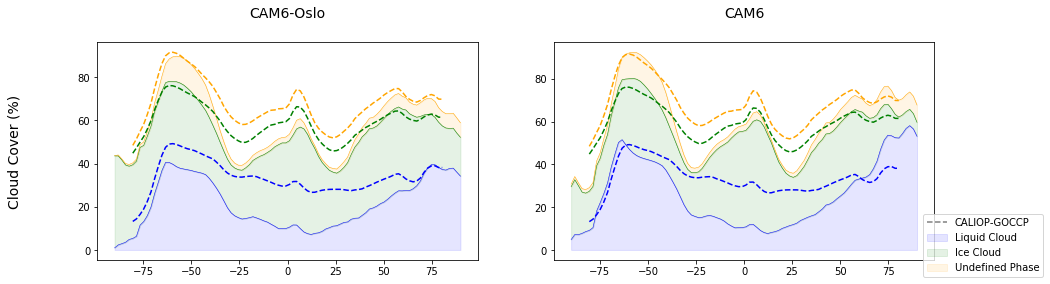

In [10]:
just_controls.plot_cloud_sum()

In [26]:
just_controls.band_bias("FSNT",[-30,30],season=None)

[['CAM6-Oslo', array(210.39747456)], ['CAM6', array(205.95062053)]]

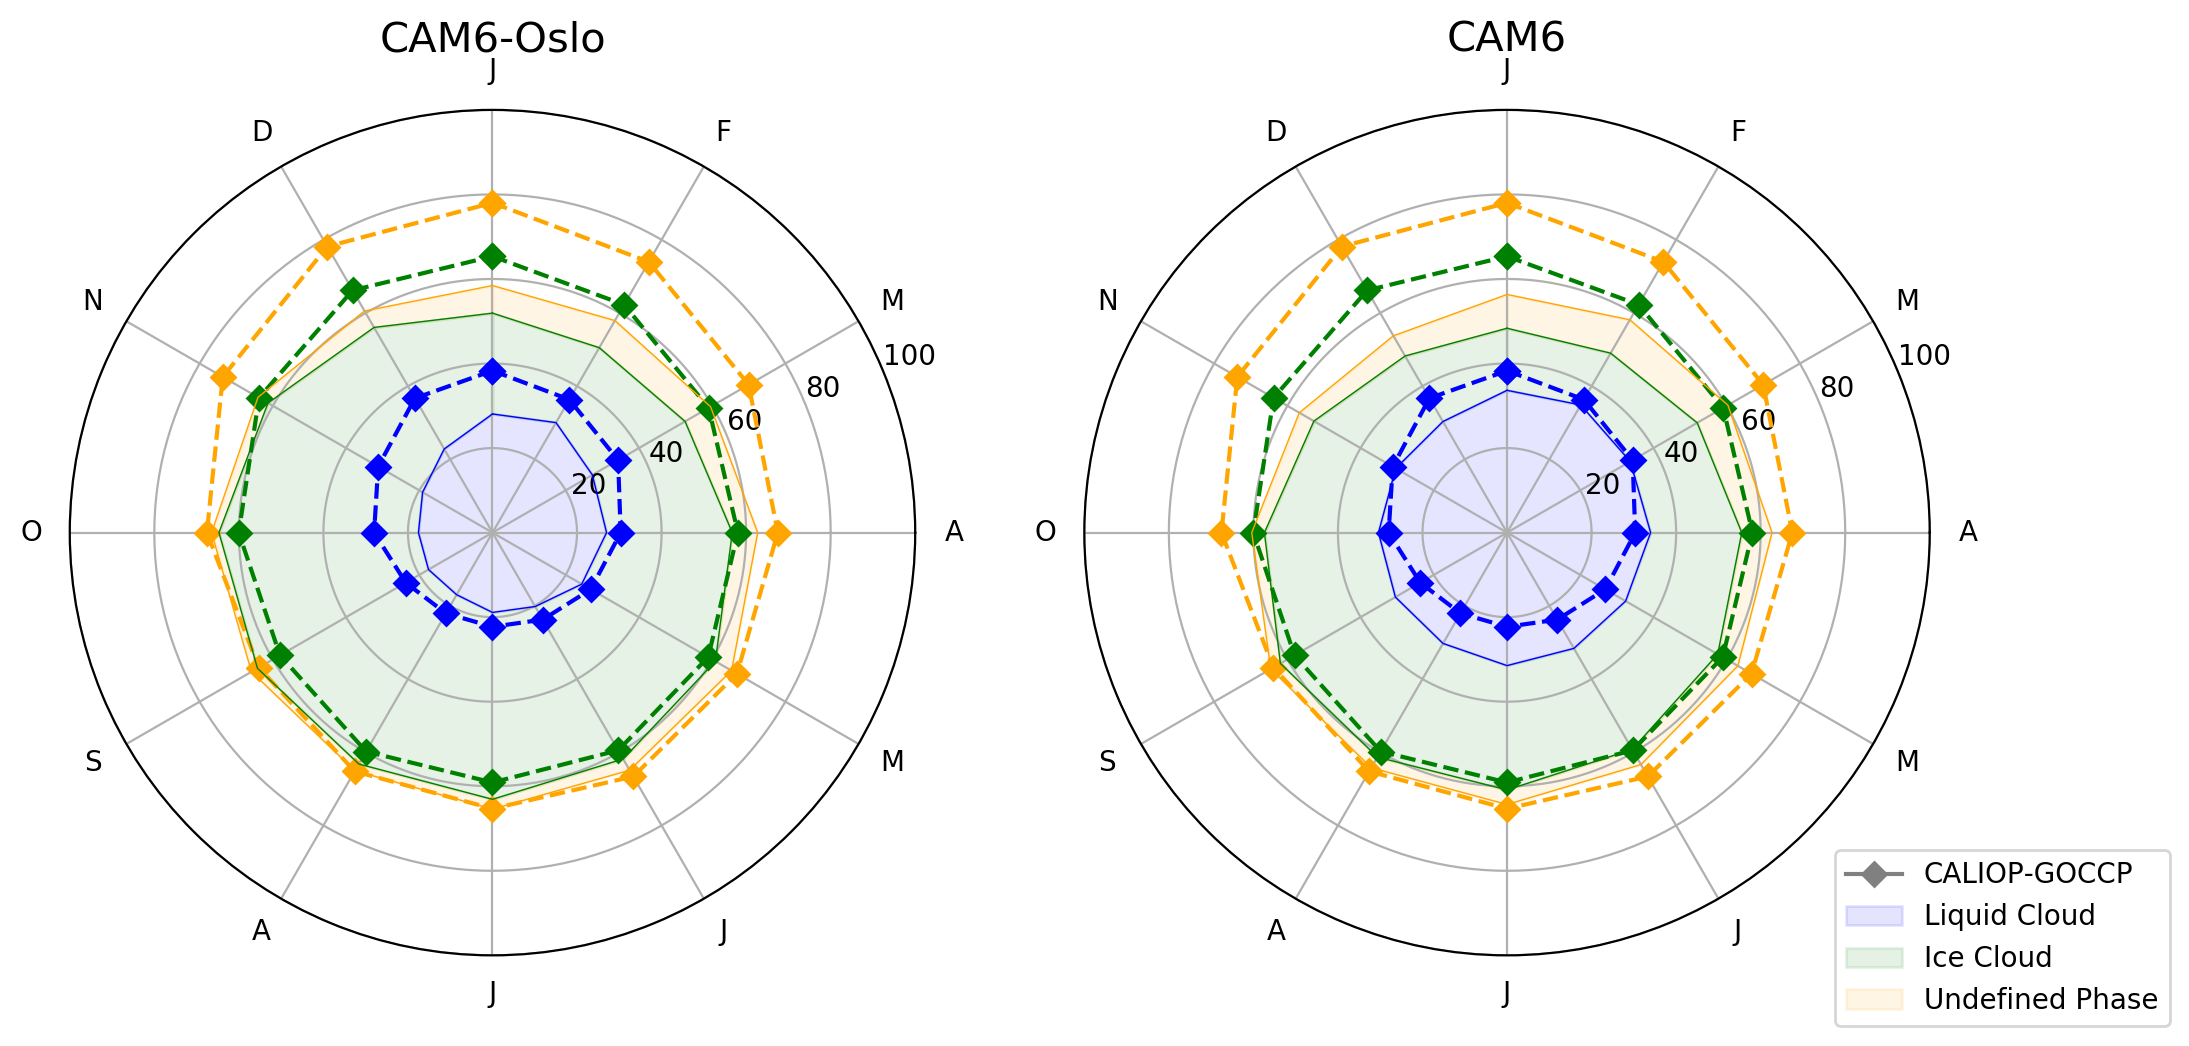

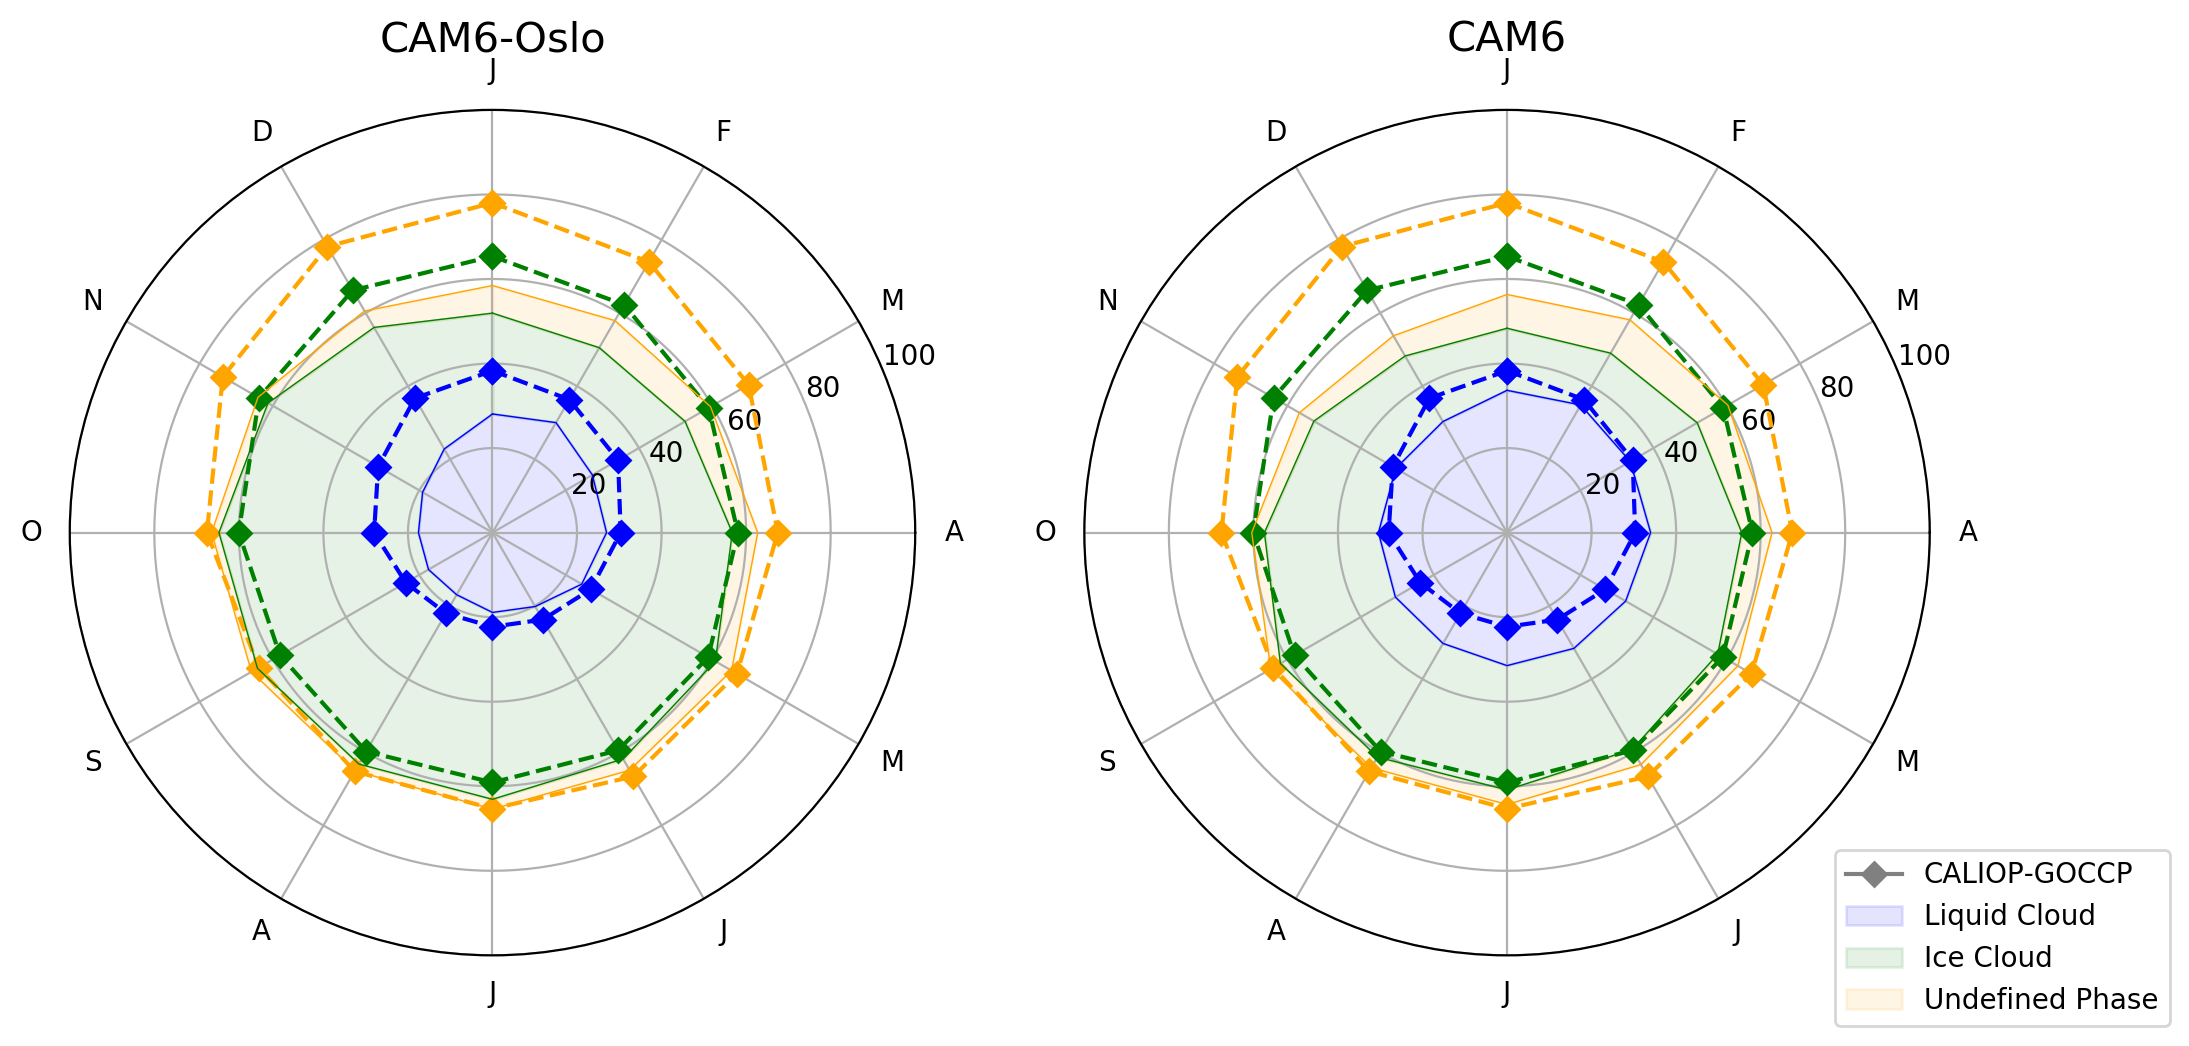

In [11]:
f1 = just_controls.cloud_polar_plot(lat_range=[-82,-60])

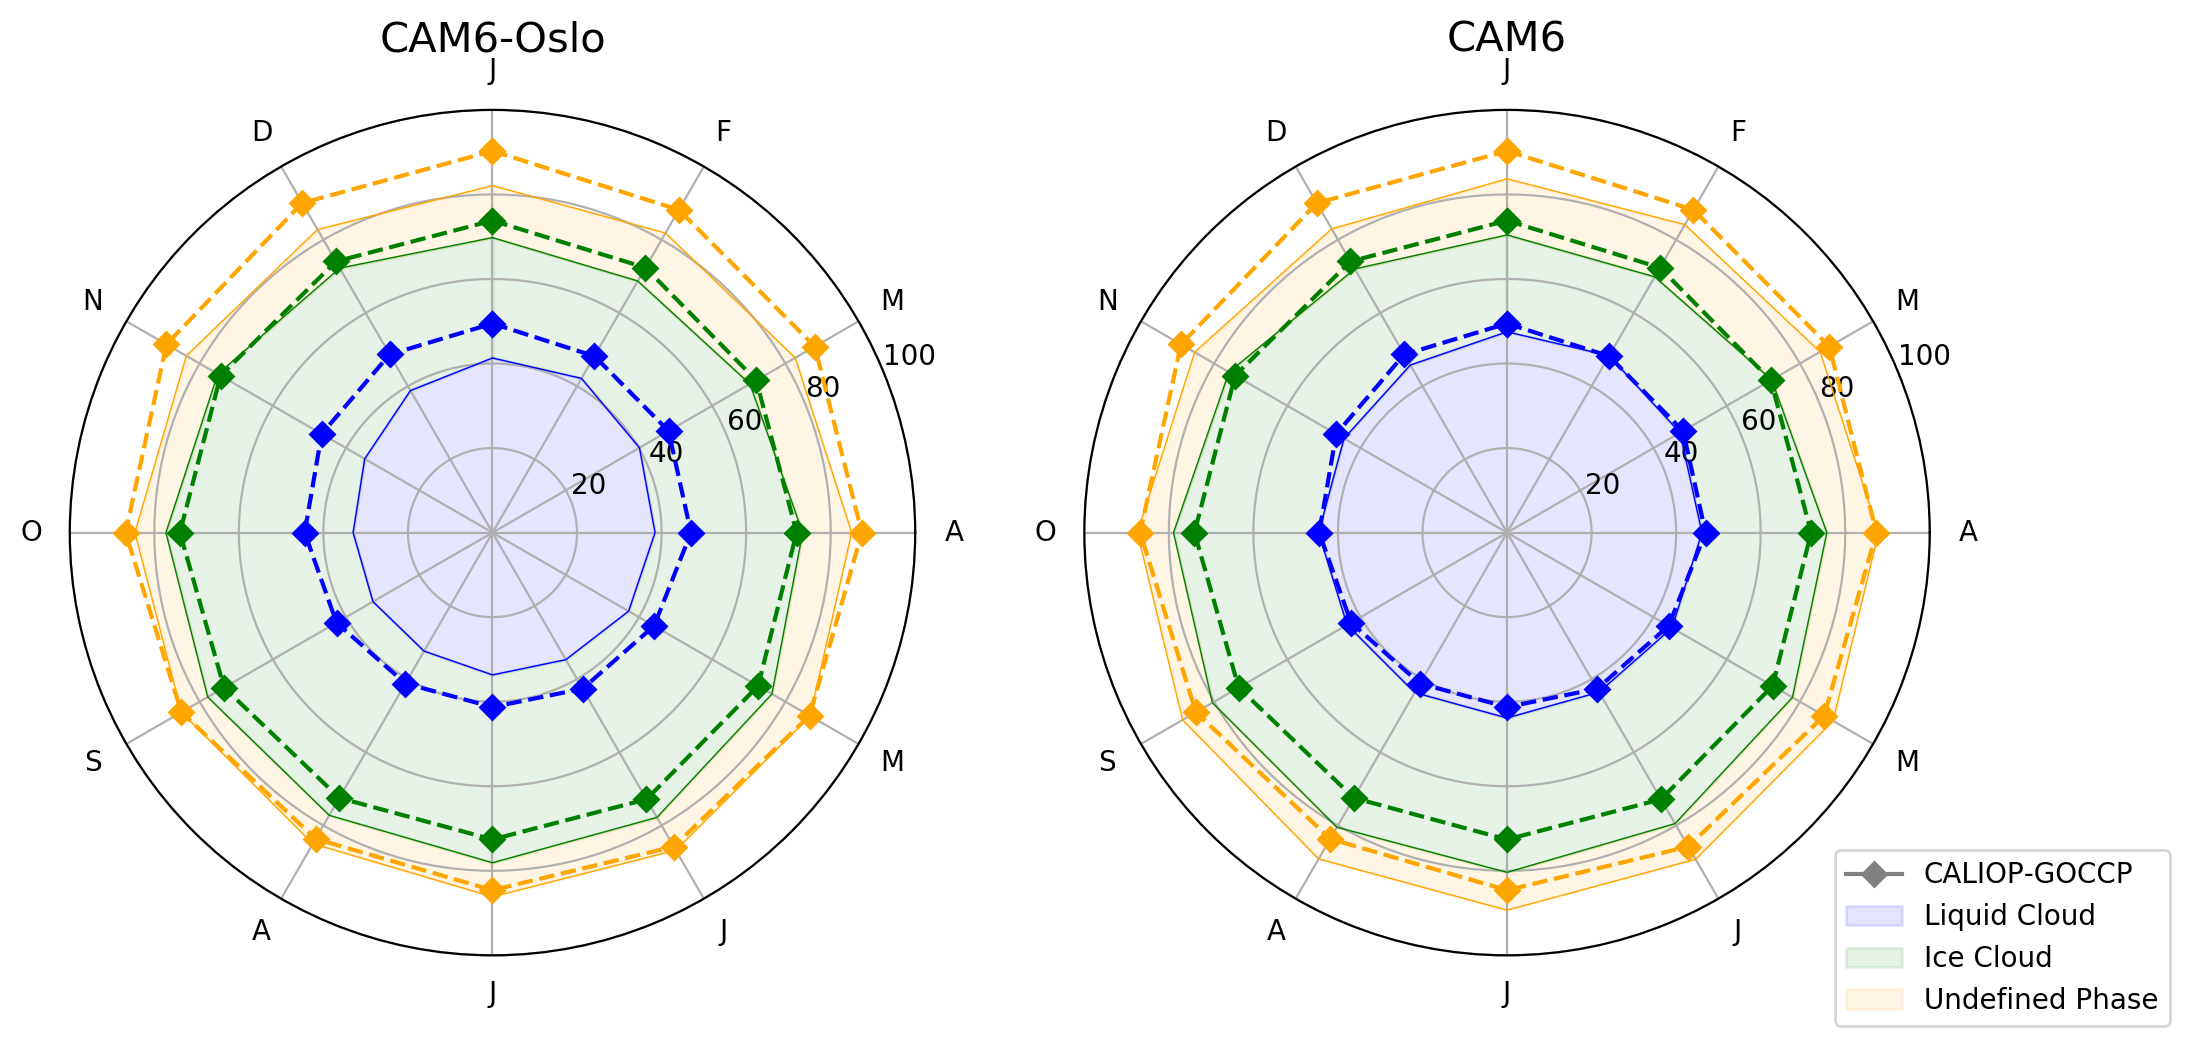

In [14]:
f1 = just_controls.cloud_polar_plot(lat_range=[-70,-50])

/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


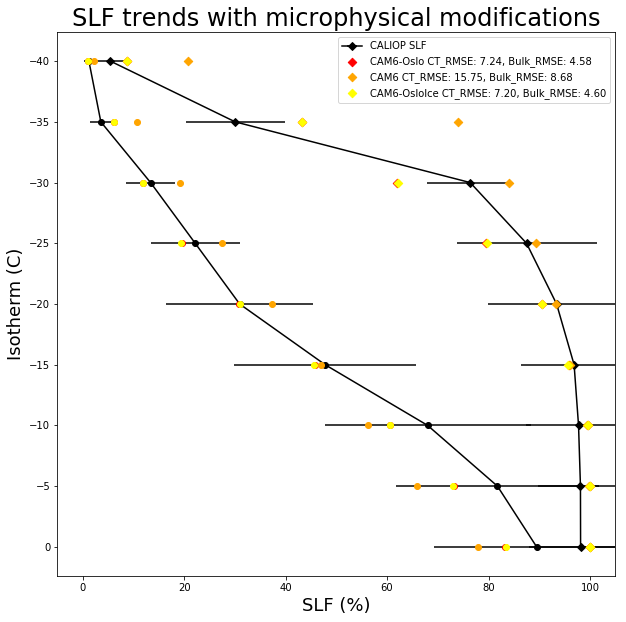

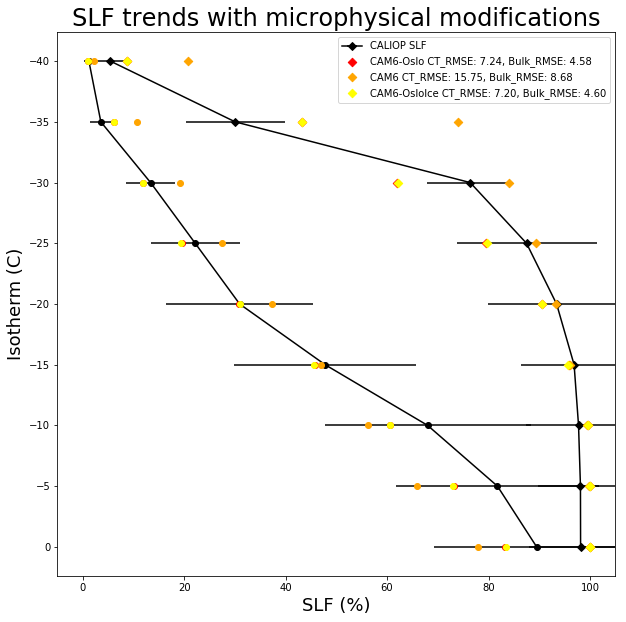

In [13]:
basemetric_slf.plot_isos_all(lat_range=[-82,-60])